In [6]:
#Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#loading data
df = pd.read_csv("diabetic_data.csv")


In [4]:
#displays 10 first lines
df.head(10)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:

#Checking data types of each variable
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [11]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign

for col in df.columns:
    if df[col].dtype == object:
        print(col,df[col][df[col] == '?'].count())
        
    

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [8]:
# gender was coded differently so we use a custom count for this one           
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 3


In [9]:
#checking shape of the dataset

df.shape

(101766, 50)

In [10]:
#dropping columns with large number of missing values

df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [11]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [12]:
for col in df.columns:
    if df[col].dtype == object:
        print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [13]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)
drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [14]:
for col in df.columns:
    if df[col].dtype == object:
        print(col,df[col][df[col] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [19]:
df.shape

(96446, 45)

In [20]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [24]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

df['numchange'] = 0

for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

df['numchange'].value_counts()

0    70142
1    24922
2     1271
3      106
4        5
Name: numchange, dtype: int64

In [25]:
df


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization,numchange
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,No,No,Ch,Yes,>30,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,Yes,NO,3,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,No,No,Ch,Yes,NO,0,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,No,No,Ch,Yes,NO,0,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,No,No,No,No,Yes,>30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,No,No,No,No,Ch,Yes,>30,0,1
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,No,No,No,No,No,Yes,NO,1,0
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,No,No,No,No,Ch,Yes,NO,1,1
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,No,No,No,No,Ch,Yes,NO,1,1


ConversionError: Failed to convert value(s) to axis units: array(['Caucasian', 'AfricanAmerican', 'Caucasian', ..., 'Caucasian',
       'Caucasian', 'Caucasian'], dtype=object)

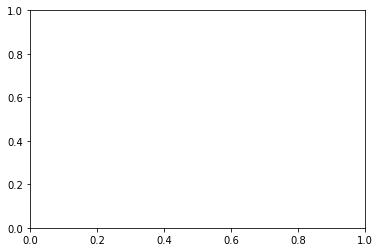

In [27]:
plt.hist(df)

(array([73835.,     0., 18560.,     0.,     0.,  1463.,     0.,   617.,
            0.,  1971.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

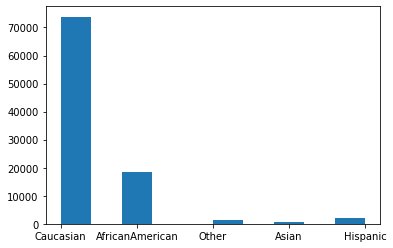

In [28]:
# histogramme
race = df['race']
plt.hist(race)

(array([52006.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 44440.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

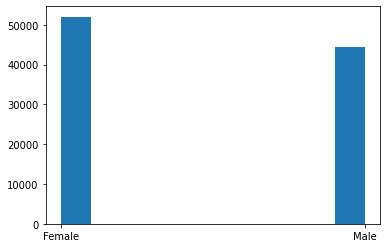

In [29]:
#pareil mais avec le genre
gender = df['gender']
plt.hist(gender)

In [30]:
df.dtypes


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

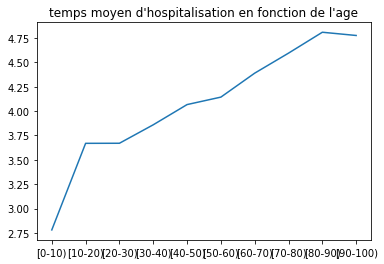

In [46]:
#moyenne du temps d'hospitalisation en fonction de l'age
age_df = df.groupby(['age']).agg({'time_in_hospital': 'mean'})


plt.subplot(title = f"temps moyen d'hospitalisation en fonction de l'age")
#sns.barplot(x = "age", y ="day in hospital" )


plt.plot(age_df)
#plt.show()
    

In [45]:
plt.bar(age_df)

TypeError: bar() missing 1 required positional argument: 'height'

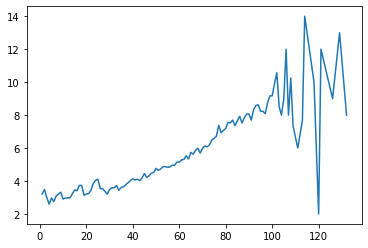

In [51]:
#pareil mais avec le nombre de lab precedures
lab_df = df.groupby(['num_lab_procedures']).agg({'time_in_hospital': 'mean'})
plt.plot(lab_df)

c:\users\hacot\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

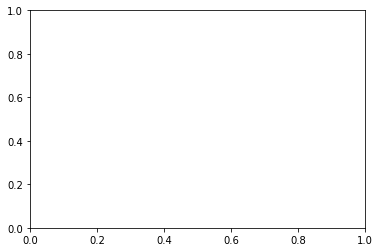

In [52]:
# re-encoding admission type, discharge type and admission source into fewer categories

 # admission type

df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

In [54]:
#discharge type

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

In [55]:
#admission source

df['admission_source_id'] = df['admission_source_id'].replace(2,1)

df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

In [57]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

 # keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)
    

In [60]:
# code age intervals [0-10) - [90-100) from 1-10

for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)

df['age'].value_counts()

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64

In [61]:
df['readmitted'].value_counts()

NO     50731
>30    34649
<30    11066
Name: readmitted, dtype: int64

c:\users\hacot\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distrinution of Readmission')

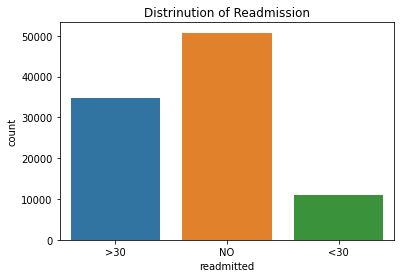

In [62]:
# Distribution of Readmission
sns.countplot(df['readmitted']).set_title('Distrinution of Readmission')

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

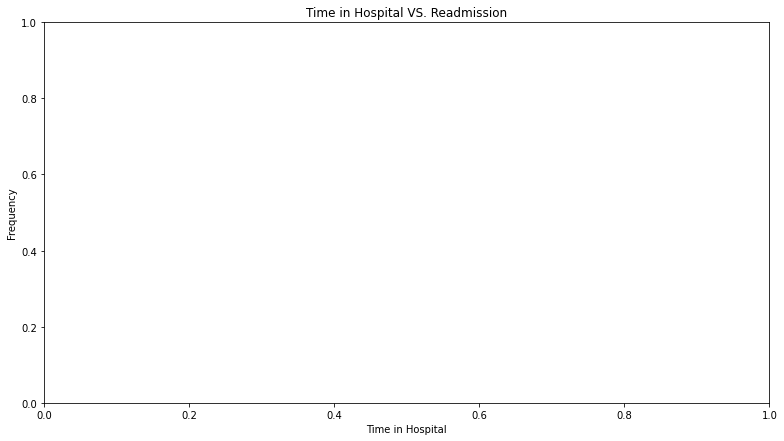

In [66]:
fig = plt.figure(figsize=(13,7),)

ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

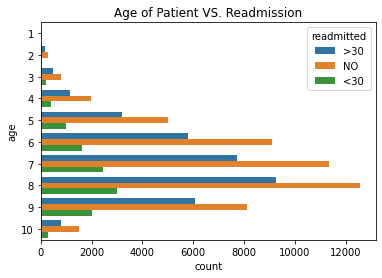

In [67]:
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

<AxesSubplot:xlabel='count', ylabel='race'>

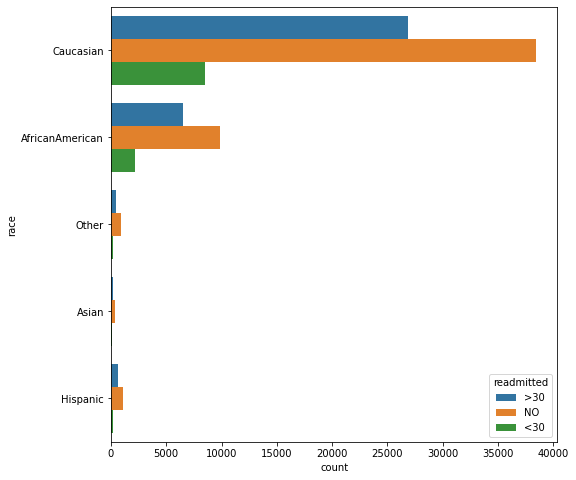

In [68]:
fig = plt.figure(figsize=(8,8))

sns.countplot(y = df['race'], hue = df['readmitted'])

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

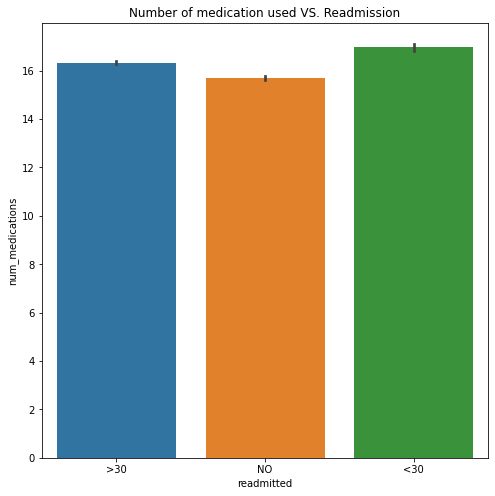

In [69]:

fig = plt.figure(figsize=(8,8))

sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

c:\users\hacot\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

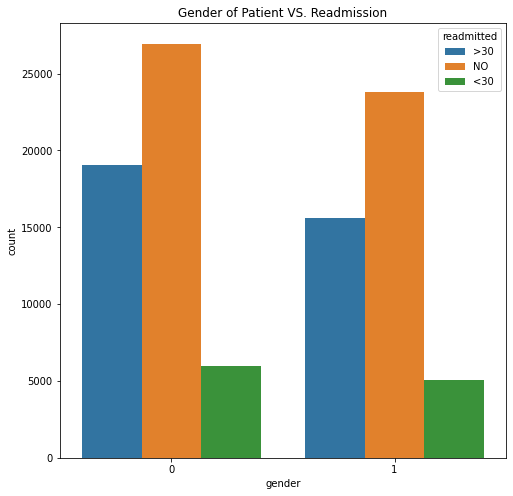

In [70]:
fig = plt.figure(figsize=(8,8))

sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

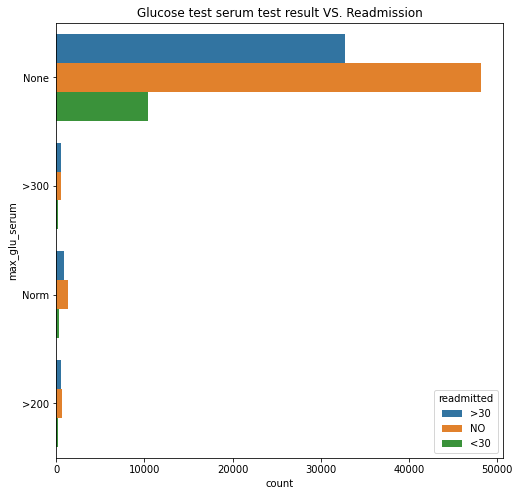

In [71]:
fig = plt.figure(figsize=(8,8))

sns.countplot(y = df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result VS. Readmission')

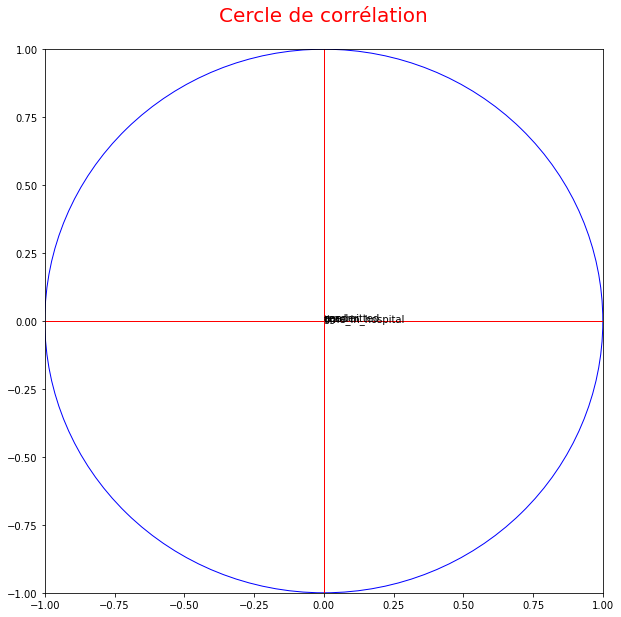

In [15]:
fig, axes = plt.subplots(figsize=(10,10))

axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

X = df[['age', 'readmitted', 'time_in_hospital', 'gender']]

p = X.shape[1]
corvar = np.zeros((p,p))

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='red',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='red',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.title('Cercle de corrélation\n', fontsize=20, color='red')
plt.show()

NameError: name 'df' is not defined

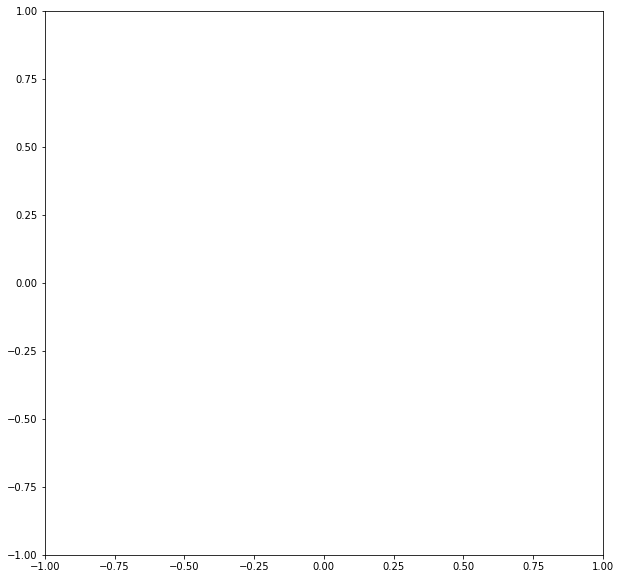

In [5]:
fig, axes = plt.subplots(figsize=(10,10))

axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

X = df[['age', 'readmitted']]

p = X.shape[1]
corvar = np.zeros((p,p))

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='red',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='red',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.title('Cercle de corrélation Age & readmission\n', fontsize=20, color='red')
plt.show()

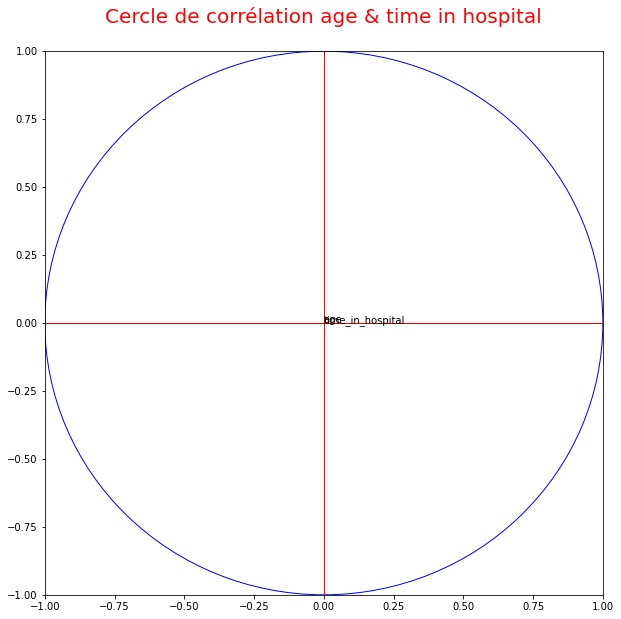

In [16]:
fig, axes = plt.subplots(figsize=(10,10))

axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

X = df[['age', 'time_in_hospital']]

p = X.shape[1]
corvar = np.zeros((p,p))

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='red',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='red',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.title('Cercle de corrélation age & time in hospital\n', fontsize=20, color='red')
plt.show()